In [45]:
import matplotlib.pyplot as plt

In [46]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

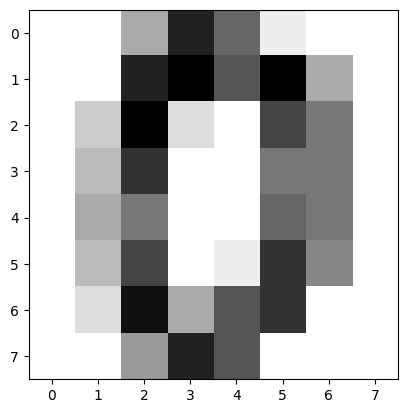

In [47]:
digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [48]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier(n_neighbors=6)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [52]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [53]:
y_pred = knn.predict(X_test)

In [54]:
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9833333333333333


[1]


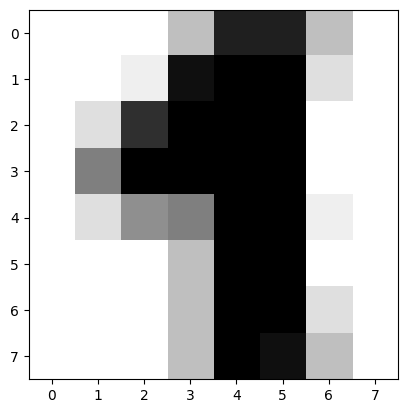

In [55]:
plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
y_pred = knn.predict([X_test[10]])
print(y_pred)